*Project 1 Group 5*

The aim of our project is to uncover opportunities within shorthaul rail in Texas. We'll examine relationships between population projections, emissions, travel time, and other related relationships derived from the data. We'll also examine the impact of the COVID-19 pandemic on shorthaul rail in Texas.

What are the growth rates of Austin and Dallas? What are the existing rail lines connecting the two cities? What is the average fuel consumption for the different modes of transporation for a distance of this Length? How will future population growth affect the future emissions?

In [81]:
import pandas as pd
import geopandas as gpd
import hvplot.pandas
import matplotlib.pyplot as plt
import requests
import numpy as np
import json
import folium
import pprint 
import seaborn

*Data Sources*

In [118]:
#Flight API Data - FlightAware Dallas
# API endpoint URL
url = "https://aeroapi.flightaware.com/aeroapi/airports/KDFW/flights"

# API Key
api_key = "x-apikey"

#Query parameters
query_params = {
    "start": "2023-02-01T19:59:59Z",
    "end": "2023-02-06T19:59:59Z",
    "type": "Airline",
   "max_pages": 10
}

# Send the API request
response = requests.get(url, headers={api_key: config.api_key}, params=query_params)

# Check if the API request was successful
if response.status_code == 200:
    #Get the data from the API response
    dallas_data = response.json()
    #Print the data
    print(dallas_data)
else:
    # Print the error message
    print("Error:", response.text)

NameError: name 'config' is not defined

In [ ]:
#Airport API Data - Austin
# API endpoint URL
url = "https://aeroapi.flightaware.com/aeroapi/airports/KAUS/flights"

# API Key
api_key = "x-apikey"

#Query parameters
query_params = {
    "start": "2023-02-01T19:59:59Z",
    "end": "2023-02-06T19:59:59Z",
    "type": "Airline",
    "max_pages": 10
}

# Send the API request
response = requests.get(url, headers={api_key: config.api_key}, params=query_params)

# Check if the API request was successful
if response.status_code == 200:
    #Get the data from the API response
    austin_data = response.json()
    #Print the data
    print(austin_data)
else:
    # Print the error message
    print("Error:", response.text)

In [119]:
austin_data_df = pd.json_normalize(austin_data['arrivals'])
dallas_data_df = pd.json_normalize(dallas_data['arrivals'])

NameError: name 'austin_data' is not defined

In [ ]:
#print(json.dumps(austin_data, indent=4, sort_keys=True))

In [ ]:
#Filter the data to only include flights from KDFW to KAUS
austin_to_dallas_df = austin_data_df[austin_data_df['origin.code'] == 'KDFW']

#Filter the data to only include flights from KAUS to KDFW
dallas_to_austin_df = dallas_data_df[dallas_data_df['origin.code'] == 'KAUS']

In [ ]:
#Total the number of flights from Dallas to Austin and Austin to Dallas by combining the two dataframes

In [ ]:
#Plot the Austin to Dallas Dataframe as a bar chart with the day of the week as the X axis and the number of flights as the Y axis

austin_to_dallas_df['scheduled_out'].value_counts()

austin_to_dallas_df['scheduled_out'].value_counts().hvplot.bar(xlabel='Day of the Week', ylabel='Number of Flights', title='Number of Flights from Austin to Dallas by Day of the Week', rot=45)


In [ ]:
#Track Data
file = "./Texas_Railroads.geojson"
track_data = gpd.read_file(file)
#Read track url into dataframe

# Create a GeoDataFrame from the track_data
gdf = gpd.GeoDataFrame(track_data, geometry='geometry')


#Filter out irrelevant tracks
gdf = gdf[(gdf["GID"] == 8359) 
          | (gdf["GID"] == 11743) 
          | (gdf["GID"] == 8263) 
          | (gdf["GID"] == 10209) 
          | (gdf["GID"] == 12792) 
          | (gdf["GID"] == 3255)
          | (gdf["GID"] == 11098) 
          | (gdf["GID"] == 11714) 
          | (gdf["GID"] == 12439) 
          | (gdf["GID"] == 12741)
          | (gdf["GID"] == 13101) 
          | (gdf["GID"] == 5689) 
          | (gdf["GID"] == 10811)
          | (gdf["GID"] == 12063)
          | (gdf["GID"] == 12792)
          | (gdf["GID"] == 8629)
          | (gdf["GID"] == 12511)
          | (gdf["GID"] == 10922)
          | (gdf["GID"] == 10814)
          ]

#Create Map of Texas
track_map = folium.Map(location=[31,-95], zoom_start=7, tiles="Stamen Terrain")
folium.GeoJson(
    gdf
).add_to(track_map)

#Add markers to map indicating Dallas Fort Worth  and Austin Bergstrom International Airport
#Dallas Fort Worth Field
folium.vector_layers.CircleMarker(location=[32.897480, -97.040443], radius=5,popup= "Dallas Airport", color='red', fill=True, fill_color='red').add_to(track_map)
#Austin Bergstrom International Airport
folium.vector_layers.CircleMarker(location=[30.1944444444, -97.67], radius=5,popup= "Austin Airport", color='red', fill=True, fill_color='red').add_to(track_map)
#Houston Airport
folium.vector_layers.CircleMarker(location=[29.9855555556, -95.3422222222], popup= "Houston Airport", radius=5, color='red', fill=True, fill_color='red').add_to(track_map)
#San Antonio Airport
folium.vector_layers.CircleMarker(location=[29.5266666667, -98.4719444444], popup= "San Antonio Airport", radius=5, color='red', fill=True, fill_color='red').add_to(track_map)
#Dallas Love Field
folium.vector_layers.CircleMarker(location=[32.848152 , -96.851349], popup= "Dallas Love Field Airport", radius=5, color='red', fill=True, fill_color='red').add_to(track_map)

#Display the Map

display(track_map)

In [ ]:
#Census API
#c2c15d86f334f8f317c455ad5503dc9b7f4a3077

# census_url = "https://api.census.gov/data/2019/acs/acs1?get=NAME,B01001_001E&for=metropolitan%20statistical%20area/micropolitan%20statistical%20area:*"

# #Track Data
# file = "./Texas_Railroads.geojson"
# track_data = gpd.read_file(file)
# #Read track url into dataframe

# # Create a GeoDataFrame from the track_data
# gdf = gpd.GeoDataFrame(track_data, geometry='geometry')

# #emissions Data for plane and train rides

In [82]:
# read PLANE fuel csv file and create dataframe
planes_fuel_csv = "Resources/planes_fuel_data_reconfig.csv"
planes_fuel_df = pd.read_csv(planes_fuel_csv, encoding="utf-8")

planes_fuel_df

,Years,Fuel consumption (million gallons) - Domestic
0,2010,"11,057"
1,2011,"10,828"
2,2012,"10,238"
3,2013,"10,156"
4,2014,"10,293"
5,2015,"10,741"
6,2016,"11,167"
7,2017,"11,340"
8,2018,"11,849"
9,2019,"12,184"


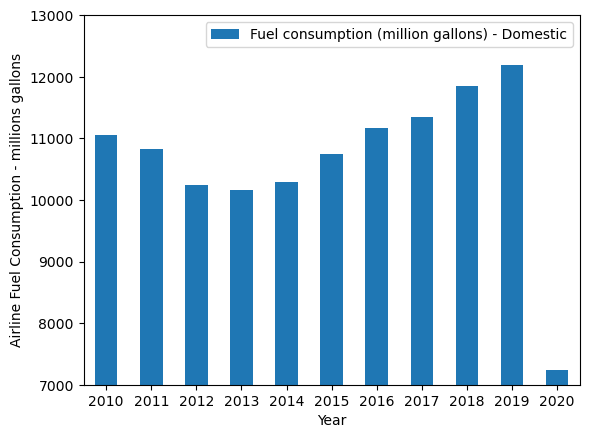

In [83]:
planes_fuel_bar = pd.DataFrame({'Year':['2010','2011','2012','2013','2014','2015','2016','2017','2018','2019','2020'], 'Fuel consumption (million gallons) - Domestic':[11057, 10828, 10238, 10156, 10293, 10741, 11167, 11340, 11849, 12184, 7233]})
plane_fuel_ax = planes_fuel_bar.plot.bar(x='Year', y='Fuel consumption (million gallons) - Domestic', rot=0)
plt.ylim(7000,13000)
plt.ylabel('Airline Fuel Consumption - millions gallons')
plt.show()

In [84]:
# read TRAIN fuel csv file and create dataframe
trains_fuel_csv = "Resources/trains_fuel_data_reconfig.csv"
trains_fuel_df = pd.read_csv(trains_fuel_csv)

trains_fuel_df

,Year,Train Diesel (million gallons)
0,2010,63
1,2011,63
2,2012,63
3,2013,66
4,2014,66
5,2015,62
6,2016,60
7,2017,64
8,2018,65
9,2019,63


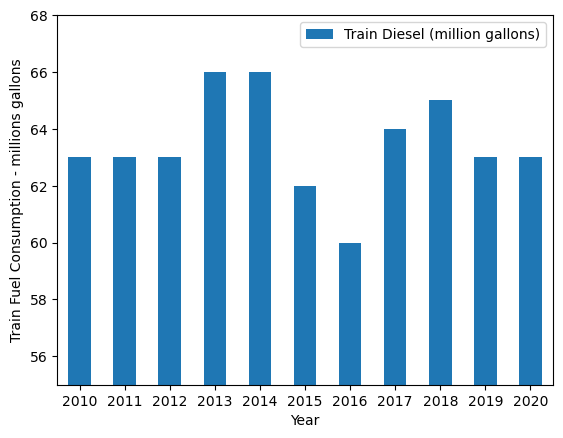

In [85]:
train_fuel_bar = pd.DataFrame({'Year':['2010','2011','2012','2013','2014','2015','2016','2017','2018','2019','2020'], 'Train Diesel (million gallons)':[63, 63, 63, 66, 66, 62, 60, 64, 65, 63, 63]})
train_fuel_ax = train_fuel_bar.plot.bar(x='Year', y='Train Diesel (million gallons)', rot=0)
plt.ylim(55,68)
plt.ylabel('Train Fuel Consumption - millions gallons')
plt.show()

In [86]:
#occupants_fatalities_csv = 

In [87]:
# read projections csv file and create dataframe
pop_proj_csv = "Resources/Austin_POP_cleaned.csv"
pop_all_df = pd.read_csv(pop_proj_csv)

pop_all_df

,Year,Total Area Population,Annualized Growth Rate
0,2011,1780535,3.70%
1,2012,1834586,3.00%
2,2013,1883315,2.70%
3,2014,1942467,3.10%
4,2015,2002134,3.10%
5,2016,2062016,3.00%
6,2017,2115475,2.60%
7,2018,2165497,2.40%
8,2019,2227083,2.80%
9,2020,2283371,2.50%


In [88]:
# Year 2011 to 2019
hist_pop_df = pop_all_df.iloc[:9]
hist_pop_df


,Year,Total Area Population,Annualized Growth Rate
0,2011,1780535,3.70%
1,2012,1834586,3.00%
2,2013,1883315,2.70%
3,2014,1942467,3.10%
4,2015,2002134,3.10%
5,2016,2062016,3.00%
6,2017,2115475,2.60%
7,2018,2165497,2.40%
8,2019,2227083,2.80%


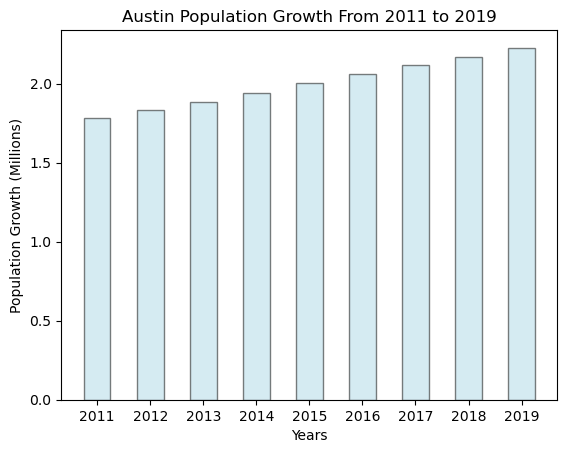

In [117]:
year = ['2011','2012','2013','2014','2015','2016','2017', '2018','2019']
x_axis = np.arange(len(year))
total_population = hist_pop_df['Total Area Population'] /10**6
plt.bar(x_axis, total_population, width=.50, fc="lightblue", ec="black", alpha=0.5, align='center')
plt.title('Austin Population Growth From 2011 to 2019')
plt.xlabel('Years')
plt.ylabel('Population Growth (Millions)')
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ['2011','2012','2013','2014','2015','2016','2017', '2018','2019'])
plt.show()

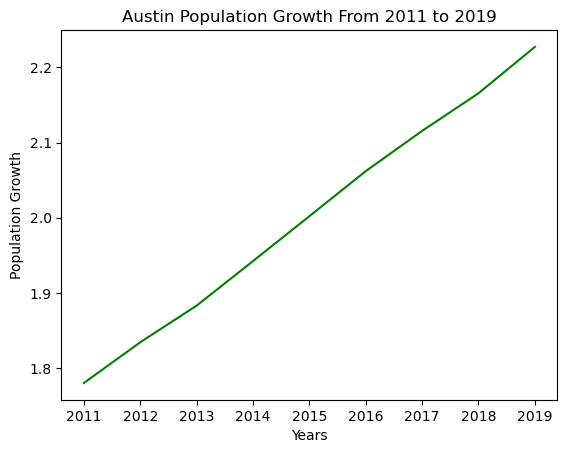

In [90]:
# line graph for population growth
year = ['2011','2012','2013','2014','2015','2016','2017', '2018','2019']
pop_austin = hist_pop_df['Total Area Population'] /10**6
plt.plot(year, total_population, color='g')
plt.title('Austin Population Growth From 2011 to 2019')
plt.xlabel('Years')
plt.ylabel('Population Growth')
plt.show()

In [91]:
# read projections csv file and create dataframe #added by Trey from Indrani2
path_csv = "Resources/DFWPOP (1).csv"
dallas_df = pd.read_csv(path_csv)

dallas_df

,Year,Dallas Population
0,2000,5196.188
1,2001,5354.623
2,2002,5476.578
3,2003,5582.033
4,2004,5689.982
5,2005,5816.407
6,2006,5999.411
7,2007,6156.652
8,2008,6301.085
9,2009,6447.615


In [92]:
# Year 2011 to 2019 #added by Trey from Indrani2
dallas_pop_df =dallas_df.iloc[11:20]
dallas_pop_df

,Year,Dallas Population
11,2011,6510.550
12,2012,6644.519
13,2013,6753.804
14,2014,6889.603
15,2015,7042.322
16,2016,7195.475
17,2017,7337.707
18,2018,7457.586
19,2019,7574.390


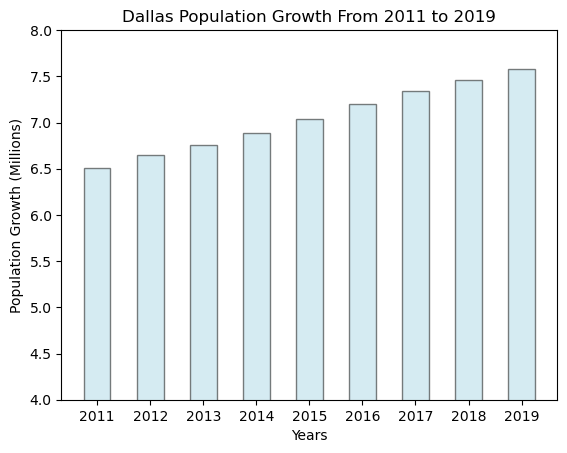

In [115]:
# Bar chart for Dallas population growth #added by Trey from Indrani2
year = ['2011','2012','2013','2014','2015','2016','2017', '2018','2019']
x_axis = np.arange(len(year))
total_population = dallas_pop_df['Dallas Population'] /10**3
plt.bar(x_axis, total_population, width=.50, fc="lightblue", ec="black", alpha=0.5, align='center')
plt.title('Dallas Population Growth From 2011 to 2019')
plt.xlabel('Years')
plt.ylabel('Population Growth (Millions)')
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ['2011','2012','2013','2014','2015','2016','2017', '2018','2019'])
plt.ylim(4,8)
plt.show()

In [94]:
# #Filter out irrelevant tracks
# gdf = gdf[(gdf["GID"] == 8359) 
#           | (gdf["GID"] == 11743) 
#           | (gdf["GID"] == 8263) 
#           | (gdf["GID"] == 10209) 
#           | (gdf["GID"] == 12792) 
#           | (gdf["GID"] == 3255)
#           | (gdf["GID"] == 11098) 
#           | (gdf["GID"] == 11714) 
#           | (gdf["GID"] == 12439) 
#           | (gdf["GID"] == 12741)
#           | (gdf["GID"] == 13101) 
#           | (gdf["GID"] == 5689) 
#           | (gdf["GID"] == 10811)
#           | (gdf["GID"] == 12063)
#           | (gdf["GID"] == 12792)
#           | (gdf["GID"] == 8629)
#           | (gdf["GID"] == 12511)
#           | (gdf["GID"] == 10922)
#           | (gdf["GID"] == 10814)
#           ]

# #Create Map of Texas
# track_map = folium.Map(location=[35,-95], zoom_start=7, tiles="Stamen Terrain")
# folium.GeoJson(
#     gdf
# ).add_to(track_map)

# #Add markers to map indicating Dallas Love Field and Austin Bergstrom International Airport
# #Dallas Fort Worth Field
# folium.vector_layers.CircleMarker(location=[32.897480, -97.040443], radius=5,popup= "Dallas Airport", color='red', fill=True, fill_color='red').add_to(track_map)
# #Austin Bergstrom International Airport
# folium.vector_layers.CircleMarker(location=[30.1944444444, -97.67], radius=5,popup= "Austin Airport", color='red', fill=True, fill_color='red').add_to(track_map)
# #Houston Airport
# folium.vector_layers.CircleMarker(location=[29.9855555556, -95.3422222222], popup= "Houston Airport", radius=5, color='red', fill=True, fill_color='red').add_to(track_map)

# #Display the Map

# display(track_map)


How are the cities of Austin and Dallas growing?


In [95]:
#Census Population projections
###What are future growth projections for Austin and Dallas
#Lin Reg or Map
#

What are the existing rail lines between the two cities?
Humdata
Plot a few lines on a map


How much fuel is consumed to fly or take the Train from Dallas to Austin?


In [97]:
# creating data frame of emissions data
Combined_fuel_emissions = "Resources/Combined_fuel_emissions.csv"
combined_fuel_emissions_df = pd.read_csv(Combined_fuel_emissions)
combined_fuel_emissions_df


,Air Carrier Fuel Consumption,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Fuel consumption (million gallons) - Domestic,"11,057","10,828","10,238","10,156","10,293","10,741","11,167","11,340","11,849","12,184","7,233"
1,Aircraft-miles (millions) - Domestic,"5,976","6,005","5,956","5,965","5,947","6,046","6,227","6,338","6,609","6,815","4,214"
2,Train Diesel (million gallons),63,63,63,66,66,62,60,64,65,63,63
3,Train-miles traveled (millions),37,37,38,38,38,38,38,38,38,38,27


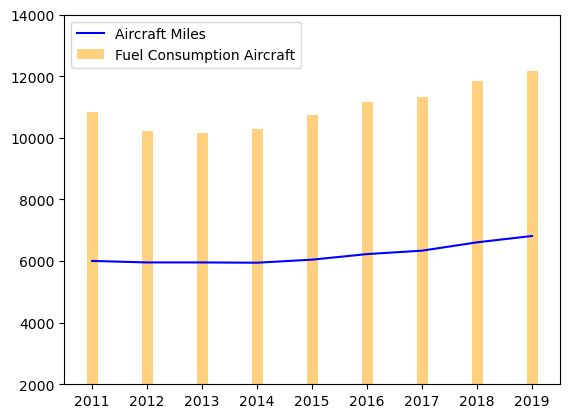

In [113]:
# creating the dataset
x_label = ['2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019']
fuel_con_aircraft = [10828,10238,10156,10293,10741,11167,11340,11849,12184]
aircraft_miles = [6005, 5956,5956,5947, 6046, 6227, 6338,6609,6815] 
#'2010', 11057, 5976, 
#'2020',7233, ,4214
fuel_consumption_miles_traveled = pd.DataFrame(
  {
    'Fuel Consumption by Aircraft': fuel_con_aircraft,
    'Aircraft Miles Traveled': aircraft_miles,
    
  }, 
  index=x_label
)
x = x_label
y1 = aircraft_miles
y2 = fuel_con_aircraft


plt.plot(x, y1, "-b", label="Aircraft Miles")
plt.bar(x, y2, width=0.2, alpha=0.5, color='orange', label="Fuel Consumption Aircraft" )
plt.legend(loc="upper left")
plt.ylim(2000,14000)
plt.show()

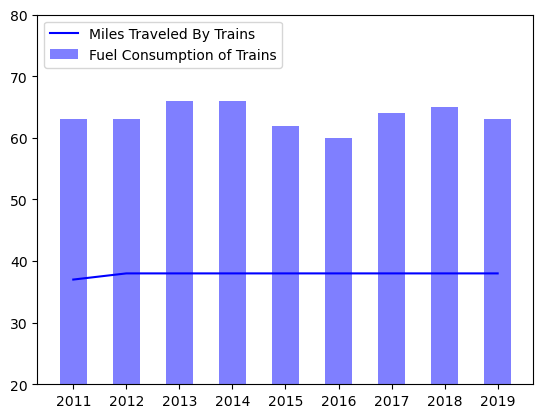

In [112]:
# creating the dataset
x_label = ['2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', ]
fuel_con_trains = [63,63,66,66,62,60,64,65,63]
train_miles = [37,38,38,38,38,38,38,38,38]
#'2010', 63, 37,
#'2020',63, 27
fuel_consumption_miles_traveled = pd.DataFrame(
  {'Fuel Consumption by Trains' : fuel_con_trains,
    'Miles traveled by Train' : train_miles
  }, 
  index=x_label
)

x = x_label
y1 = train_miles
y2= fuel_con_trains
plt.plot(x, y1, "-b", label= "Miles Traveled By Trains")
plt.bar(x, y2, width=.50 ,alpha=0.5, color= 'blue', label="Fuel Consumption of Trains")
plt.legend(loc="upper left")
plt.ylim(20,80)
plt.show()

How will population growth affect future fuel and CO2 emissions?
